In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


 # EDA to Prediction(DieTaninc)
 
 Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.
 

타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다. 1912년 4월 15일 첫 항해 중 타이타닉호는 빙산과 충돌, 침몰하여 2224명의 승객과 승무원 중 1502명이 사망했습니다. 그래서 DieTanic입니다. 이 재난은 세상 누구도 잊은 이 없는 굉장히 잊지 못할 재난입니다.

타이타닉을 만드는 데 약 750만 달러가 들었고 충돌로 인해 바다에 가라앉았습니다. Titanic Dataset은 초보자가 데이터 사이언스의 여정을 시작하고 캐글의 컴퍼티션에 참가할 수 있는 매우 좋은 데이터셋입니다.

이 노트북의 목적은 **예측 모델링 문제의 워크플로우가 어떤 것인지 아이디어를 제공**하는 것입니다. 기능을 확인하는 방법, 새로운 기능 및 일부 기계학습 개념을 추가하는 방법. 저는 초보자도 모든 단계를 이해할 수 있도록 노트북을 가능한 한 기초적 내용으로 유지하려고 노력했습니다.

이 노트북이 좋다고 생각하고 도움이 됐으면 upvote 눌러주셈.. 동기부여됨!

## **노트북 컨텐츠:**

**Part1 : Exploratory Data Analysis(EDA) - 탐색적 데이터 분석**
1) feature 분석    
2) 여러 feature를 고려하여 관계 또는 트렌드 찾기    

**Part2 : Feature Engineering and Data Cleaning**
1) 몇개의 feature들을 추가    
2) 중복되는 feature 제거    
3) 모델링에 적합한 형태로 feature 변환

**Part3 : Predictive Modeling**
1) 베이직 알고리즘 실행    
2) cross validation    
3) 앙상블    
4) 중요 feature 추출

## **Part1 : Exploratory Data Analysis(EDA)**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # 특정 스타일 사용(구글링하면나옴)
import warnings
warnings.filterwarnings('ignore') # warning 무시
%matplotlib inline


In [3]:
data = pd.read_csv('../input/titanic/train.csv')

# tr셋을 data에다가 담았어요

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum()
# null값 확인
# age, cabin에 개많고 embarked에 2개있다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age, cabin, embarked에 널 값이 있네예
저걸 없애보겠어요

**얼마나 생존했나요?**    
한 번 봅쉬다

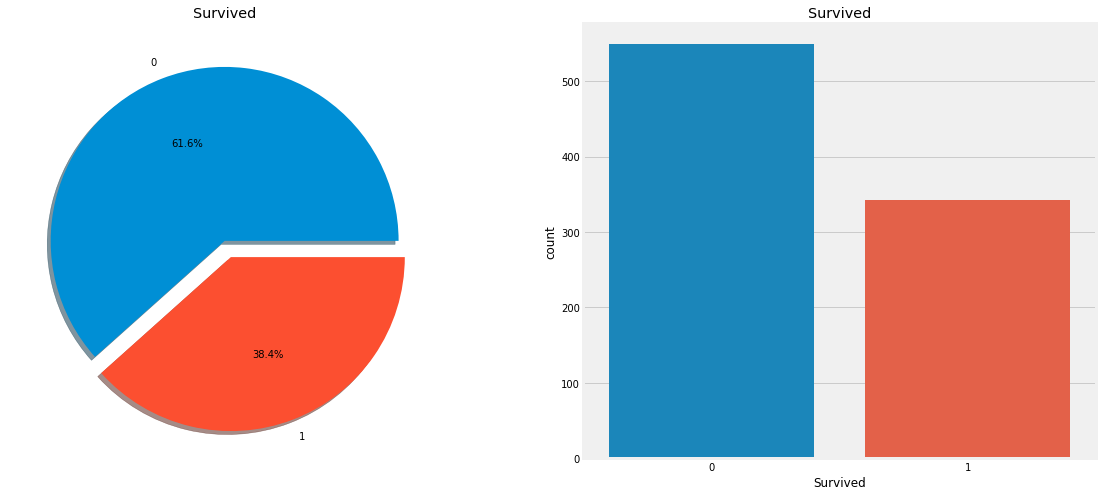

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# 객체생성
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
# tr셋에서 Survived 컬럼의 데이터에서 값을 count해서 파이차트 그리기
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 생존여부에 따른 비율과 amount를 알 수 있다.


명백하게 많은 탑승객이 살아남지 못한 것을 알 수 있당..

tr set에 있는 891명의 승객 중 약 350명만 생존했습니다. 즉, 전체 tr set의 38.4%만이 충돌에서 생존했습니다. 데이터에서 더 나은 인사이트를 얻고 생존한 승객 카테고리와 생존하지 못한 승객 카테고리를 확인하려면 더 자세히 파봐야됩니다.

데이터셋의 다양한 기능을 활용하여 생존율을 확인하려고 합니다. feature 중 sex, port of embarcation, age 등.

먼저 feature들의 다른 타입들을 이해해봅시다.

## **Types Of Features**

* **Categorical Features:**
범주형 변수는 두 개 이상의 범주가 있는 변수이며 해당 기능의 각 값은 범주별로 분류될 수 있습니다. 예를 들어, 성별은 두 개의 범주(남성과 여성) 가 있는 범주형 변수입니다. 이제 우리는 그러한 변수를 정렬할 수 없거나 순서를 지정할 수 없습니다?
명목변수라고도 합니다.

**범주형 Features : Sex, Embarked**


* **순서형 Features:**
순서형 범주(Ordinal Variable)는 범주형 변수와 비슷하지만, 두 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 차이점이 있습니다. 예를 들어, 길다, 중간, 짧다 라는 값을 가지는 Height feature는 서수 변수입니다. 여기서 우리는 변수에 상대적인 값으로 정렬을 할 수 있습니다.

**순서형 Features : Pclass**


* **연속형 Feature:**
특성이 두 점 사이 또는 특성 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 특성을 연속적이라고 합니다.

**연속형 Feature : Age**

## Feature 분석
### Sex -> 범주형 feature

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

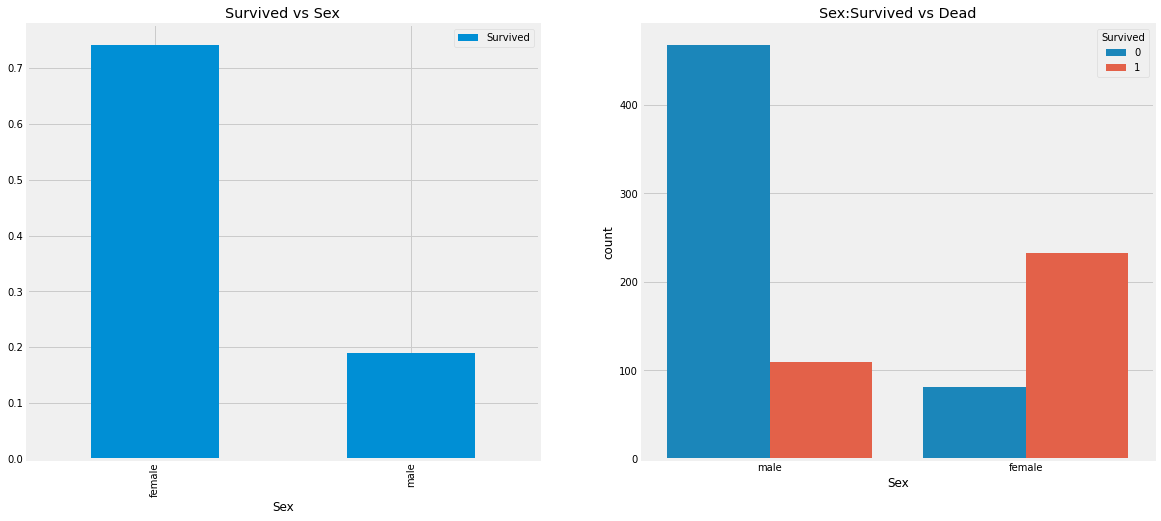

In [8]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

흥미롭습니다. 배에 탄 남성의 숫자는 여성의 숫자보다 훨씬 많습니다. 그러나 구조된 여성의 수는 구조된 남성의 수의 거의 두 배입니다. 배에 탄 여성의 생존율은 약 75%고(왼쪽그래프) 반면에 남성의 생존율은 약 18-19%입니다.

이 특징은 모델링에 매우 중요한 feature인 것 같습니다. 그런데 이게 최선일까요?? 다른 기능을 한 번 확인해봅시다.

## Pclass -> 순서형 Feature


In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


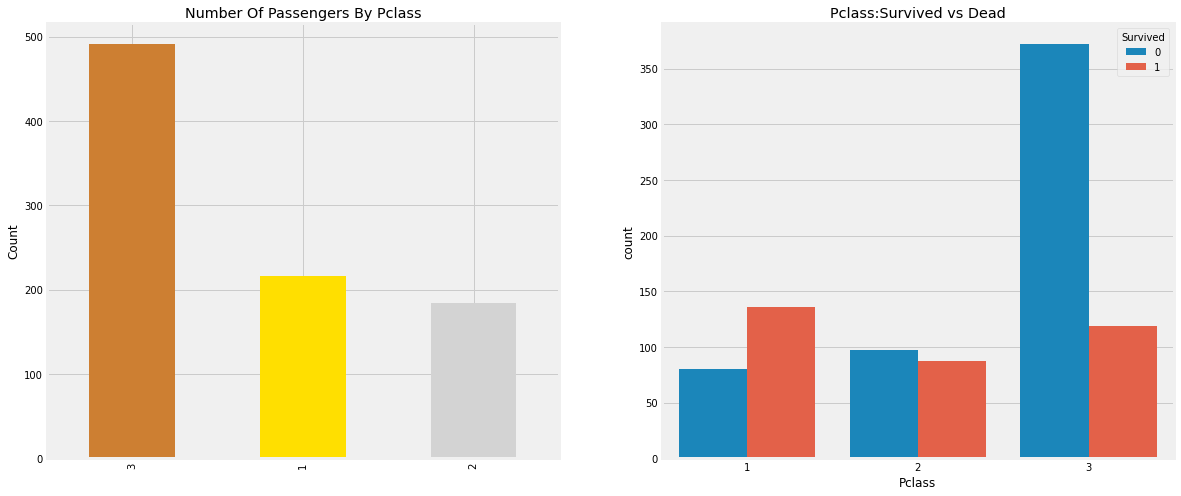

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data = data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 무릇 **돈으로 모든 것을 살 수는 없다고 말합니다.** 그러나 우리는 Pclass 1의 탑승객들이 구조 당시 매우 높은 우선순위를 부여받았다는 것을 분명히 알 수 있습니다. Pclass 3의 승객 수가 훨씬 많았음에도 불구하고 여전히 생존자의 수는 매우 낮습니다. 약 25% 정도로.

Pclass 1의 경우 생존율은 약 63%이고 Pclass2의 경우 약 48%입니다. 그래서 돈과 지위가 중요합니다. Such a meterialistic world! 이런 물질만능주의!

조금 더 자세히 살펴보고 다른 흥미로운 관찰을 확인해 보겠습니다. Sex와 Pclass에 따른 생존율을 확인해봅시다.


In [11]:
pd.crosstab([data.Sex,data.Survived], data.Pclass, margins = True).style.background_gradient(cmap='summer_r')

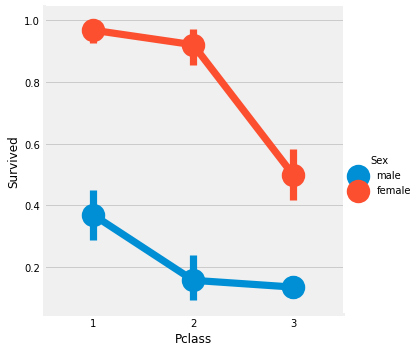

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
plt.show()

이 경우 Factorplot을 사용합니다. 범주형 값을 쉽게 분리할 수 있기 때문입니다.

crosstab과 factorplot을 보면 pclass1의 여성 94명 중 3명만 사망했기 때문에 Pclass1의 여성 생존율이 약 95-95%임을 쉽게 추론할 수 있습니다.

Pclass와 상관없이 구조 시 여성이 우선인 것은 분명합니다. pclass1의 남자조차도 생존율이 매우 낮습니다.

pclass도 중요한 feature인 것 같습니다. 다른 feature를 분석해봅시다~

## Age -> Continuos Feature

In [13]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')


Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


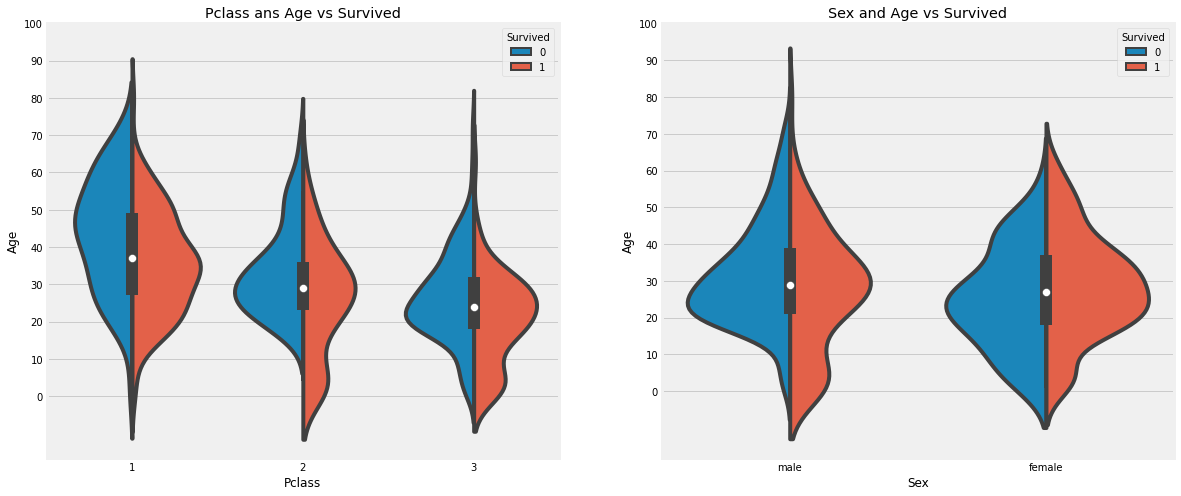

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass","Age", hue ="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass ans Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived", data = data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**관찰결과:**
1) Pclass에 상관없이 아동의 수는 증가하고 10세 미만 승객(즉 아동)의 생존율은 pclass에 상관없이 양호해 보인다.
2) pclass1의 20~50세 승객의 생존 가능성이 높고 여성이 더 낫습니다.
3) 남성의 경우 나이가 많을 수록 생존 확률이 낮아집니다.

이전에 보았듯 Age feature에는 177개의 null값이 있습니다. 이러한 nan값을 대체하기 위해 데이터셋의 평균 Age를 할당 할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많았다는 것입니다... 우리는 평균 연령이 29세인 4세 아이를 할당할 수 없습니다!! 

빙고! 이름 feature를 확인할 수 있죠 ~ feature를 살펴보면 이름에 Mr 또는 Mrs와 같은 salutation이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균값을 각 그룹에 할당할 수 있습니다.

### 이름에 뭐가 있는지 확인해보자 feature로 만들어보자

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    

자 여기서 정규표현식을 사용하고 있습니다. ([A-Za-z]+)\. <- 이거요
A-Z 또는 a-z 사이에 있고 뒤에 점(.) 이 오는 문자열을 찾는 것입니다. 따라서 이름의 이니셜을 잘 추출해 냅니다.

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


좋습니다. Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 틀린 이니셜이 있네요. 그것들을 Miss로 대체하고 다른 값에 대해서도 같은 것을 사용하겠습니다.

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### NaN Age 채우기

In [19]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any()

False

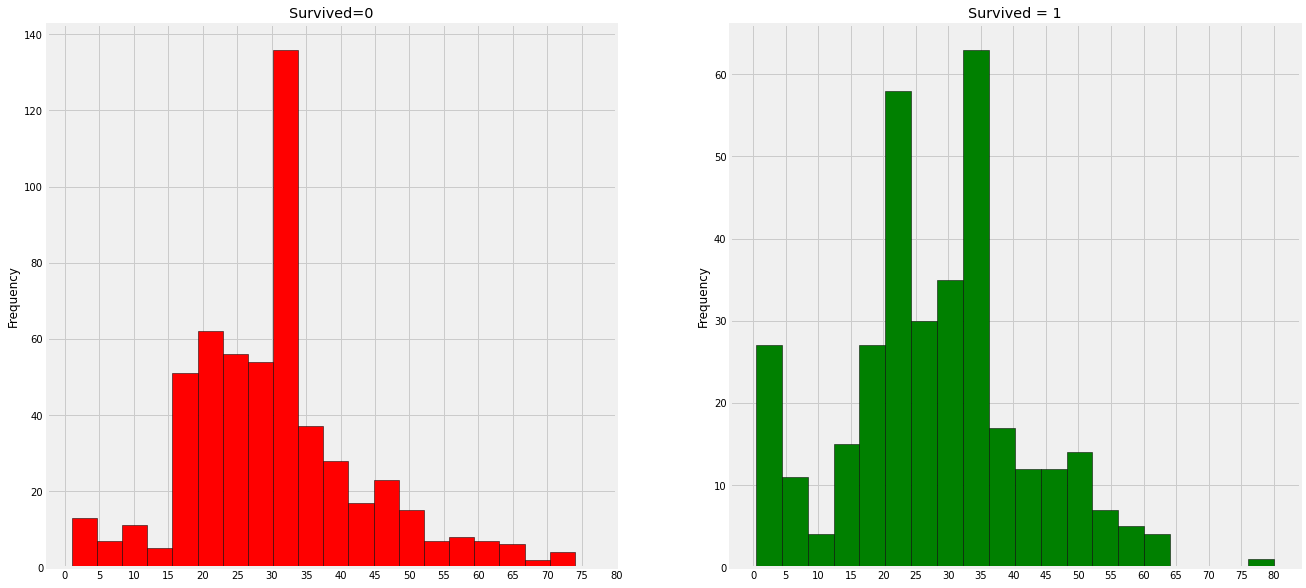

In [21]:
f, ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**관찰결과:**
1) 유아(5세미만)를 많이 구함(여성아동 우선구조 정책)
2) 가장 나이많은 승객도 구조됐다.(80세)
3) 최대 사망자 수는 30~40대 연령층이었다.

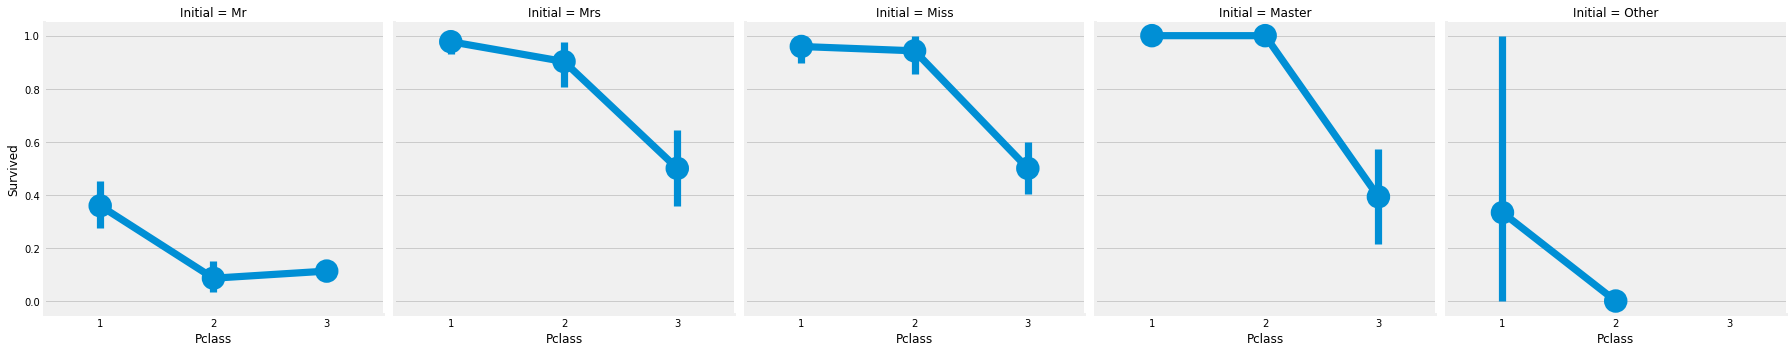

In [22]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()


따라서 여성아동우선 구조정책은 class에 관계없이 유효합니다.

### Embarked -> 범주형 변수


In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**승선항에 따른 생존 가능성.**

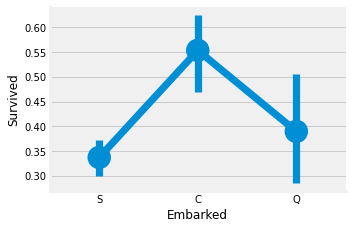

In [24]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
# gcf : get current figure 현재 그래프를 보여줌
fig.set_size_inches(5,3)
plt.show()

포트 c의 생존 가능성은 약 0.55로 가장 높고 s의 경우 가장 낮습니다.

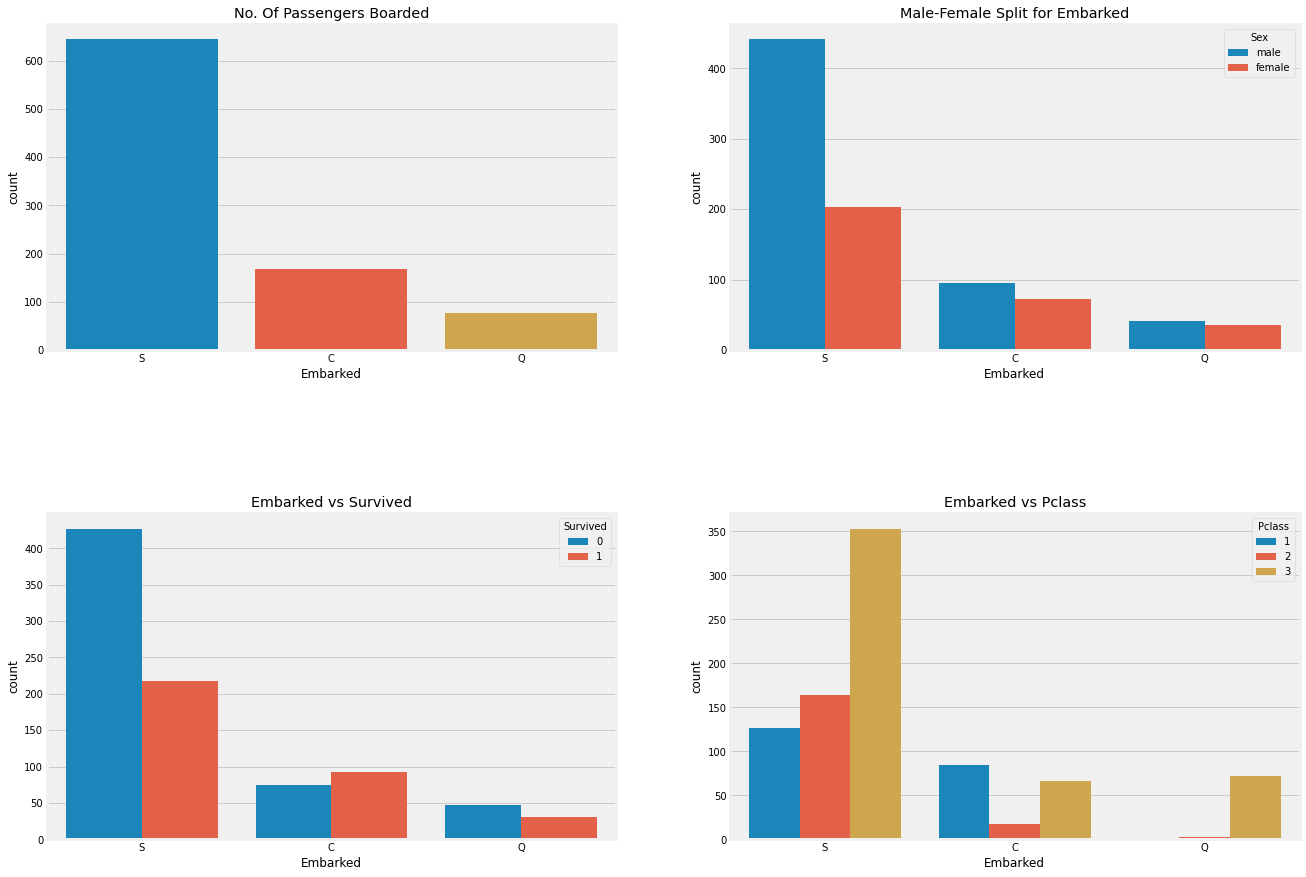

In [25]:
f, ax = plt.subplots(2,2, figsize =(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass',data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**관찰결과:**
1) S에서 가장 많은 승객들이 탑승을 했습니다. 대부분이 class 3 승객들입니다.
2) c 탑승객들은 그들 중 상당수가 살아남았기 때문에 운이 좋아 보입니다. 그 이유는 아마도 모든 Pclass1 및 Pclass2 승객이 구조되었기 때문입니다.
3) 탑승 항구 s는 부자들이 많이 탄 것으로 보입니다. 그러나 생존 가능성은 낮습니다. pclass 3의 승객 중 81%가 생존하지 못했기 때문입니다. 
4) Q는 승객들의 약 95%가 class 3입니다.

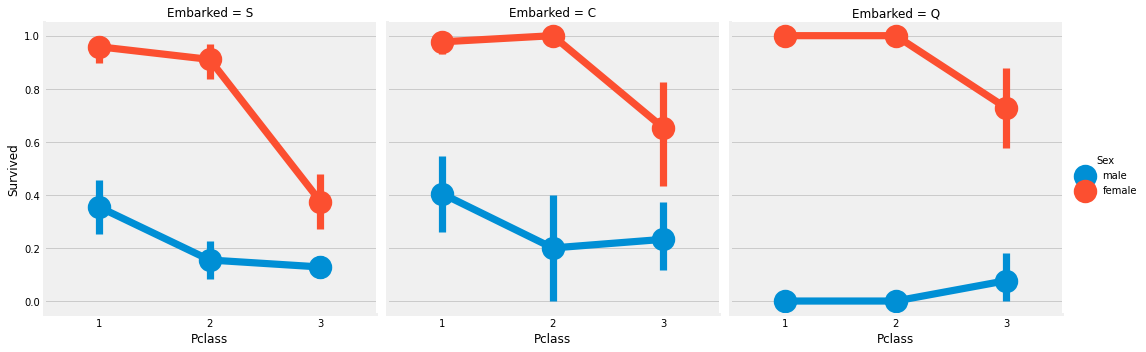

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**관찰결과:**
1) pclass에 관계없이 pclass1과 pclass2는 여성의 생존 확률이 거의 1입니다.
2) port3에서, 남녀 모두 생존율이 매우 낮기 때문에 port s는 pclass3 탑승자들에게 매우 불행해 보입니다. (돈문제임)
3) 거의 모든것이 pclass3에서 나왔기 때문에 portQ는 남성에게 가장 불행해보입니다.

### Embarked NaN값 채우기
포트 S에서 탑승객이 최대였으므로, 우리는 NaN값을 S로 채우겠습니다.


In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.Embarked.isnull().any()

False

### SibSp -> Discrete Feature
이 feature는 어떤 사람이 혼자인지, 아니면 가족과 함께 있는지를 나타냄.    
sibling = 형제자매 이복형제자매    
spouse = 남편, 아내


In [29]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


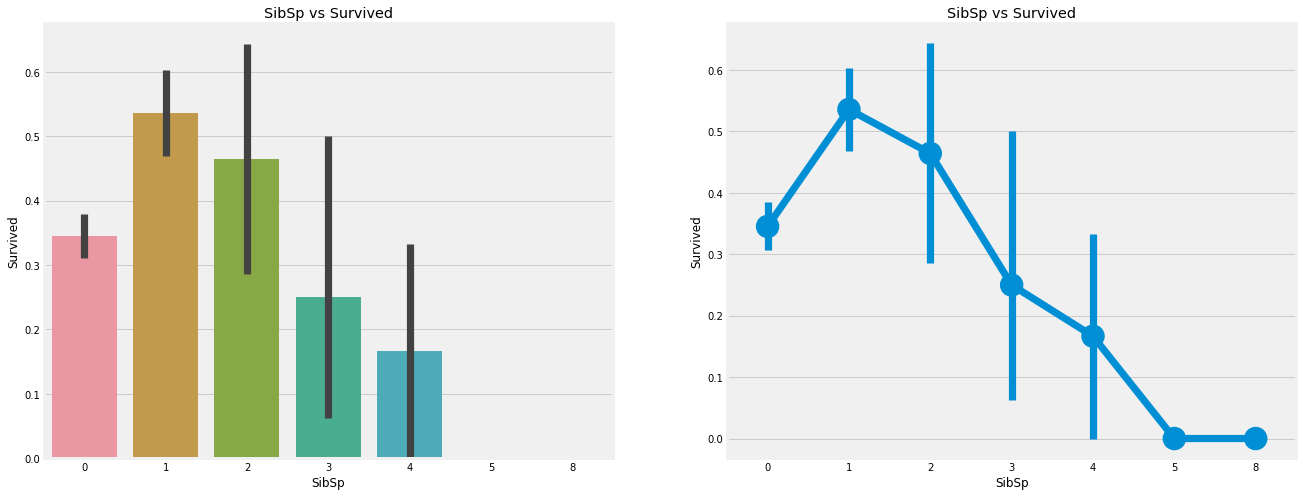

In [30]:

f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp','Survived', data=data, ax=ax[0])
# This creates 'Figure 2' but instead of drawing on Figure 2 
# you tell seaborn to draw on axes[0] from Figure 1, so Figure 2 remains empty.
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp','Survived', data= data, ax=ax[1], sharey=False)
ax[1].set_title('SibSp vs Survived')

# plt.close(2)
plt.show()

# factorplot은 그림그리는 그래프? 성질이고 pointplot은 축기반? 이라서? 된다?네?
# catplot 또는 factorplot은 그림 수준 함수입니다. 
# 이것은 그들이 축의 수준이 아닌 그림의 수준에서 작업해야한다는 것을 의미합니다.
# https://stackoverflow.com/questions/54959764/seaborn-factorplot-generates-extra-empty-plots-below-actual-plot

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**관찰결과:**
barplot 및 factorplot(pointplot)은 승객이 형제 없이 혼자 탑승하는 경우 생존율이 34.5%임을 보여줍니다.
형제 수가 증가하면 그래프가 대략적으로 감소합니다. 이것은 의미가 있습니다. 즉, 배에 가족이 있다면 나 자신을 먼저 구하는 것이 아니라 가족을 구하려고 합니다. 놀랍게도 5~8인 가족의 생존율은 0%입니다. 그 이유는 아마도 Pclass???

네. 그 이유는 Pclass였습니다... crosstab은 형제수가 3보다 많은 사람들이 모두 pclass 3에 있는 것을 보여줍니다.. 형제수가 3보다 많은, pclass 3의 모든 대가족이 사망하는 것이 임박했습니다?

### Parch


In [32]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')
# parch 별 class 등급


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


더 대가족일수록 pclass 3에 있음을 보여줌.

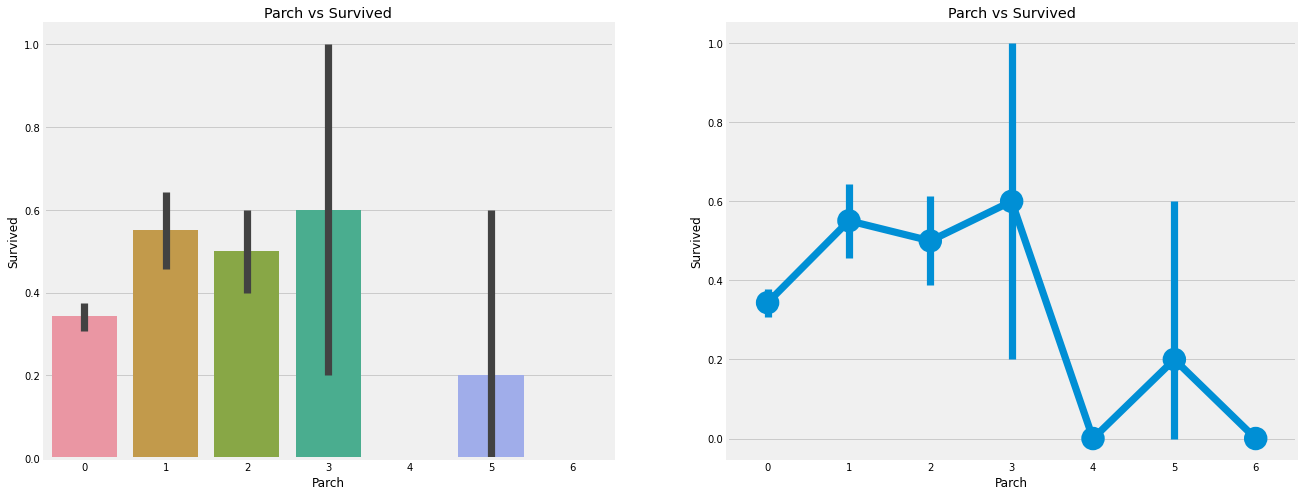

In [33]:
f, ax= plt.subplots(1,2, figsize=(20,8))
sns.barplot('Parch','Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

**관찰결과:**
여기서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 커질수록 감소합니다.

배에 1~3명의 부모가 있는 사람에게는 생존가능성이 높습니다. 혼자있는 것도 치명적이며 배에 부모가 4명 이상인 경우 생존 가능성이 감소합니다.

## Fare -> 연속형 feature

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 운임은 0.0입니다. 와오! 공짜 럭셔리 탑승!@!#! ~(어쩔)~

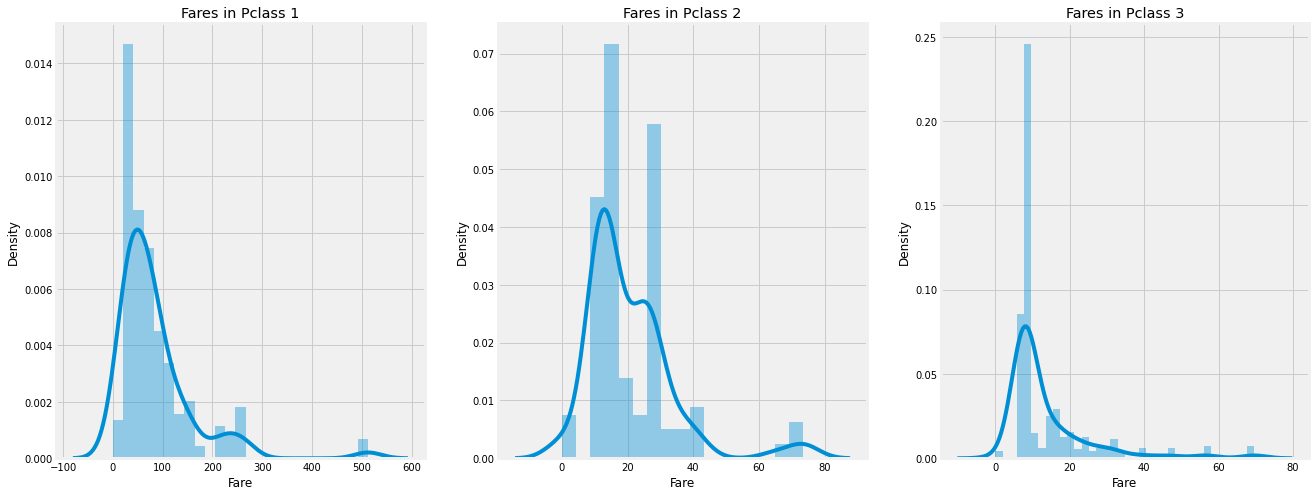

In [35]:
f, ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
# pclass가 1인 데이터별 fare 분포 보
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

pclass1승객의 운임 분포가 크게 나타나고 이 분포는 기준이 감소함에 따라 계속 감소합니다. 이것도 연속적이므로 binning을 사용하여 이산 값으로 변환할 수 있습니다.(구간화)

### 모든 features에 대한 간략한 관찰결과:
**Sex:** 여성의 생존 가능성은 남성에 비해 높습니다.    

**Pclass:** 1등석 승객이 되면 생존 가능성이 더 높아진다는 가시적인 추세가 있습니다. pclass3의 생존율은 매우 낮습니다. 여성의 경우 pclass1의 생존 확률은 거의 1이고 pclass2의 생존 확률도 높습니다. 돈이 이긴다!!!! ~오바쩐다~

**Age:** 5~10 세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다. 

**Embarked:** 이것은 매우 흥미로운 feature입니다. pclass1 승객의 대다수가 S에서 탑승했음에도 불구하고 C에서 생존할 확률이 더 높아 보입니다. Q의 승객들은 모두 Pclass에서 왔기 때문에1!!!!

**Parch+SibSp:** 1-2명의 형제자매, 배우자가 탑승하거나 1-3명의 부모가 있는 경우, 혼자이거나 대가족이 함께 여행하는 것보다 생존확률이 더 높습니다.


### feature간의 상관관계

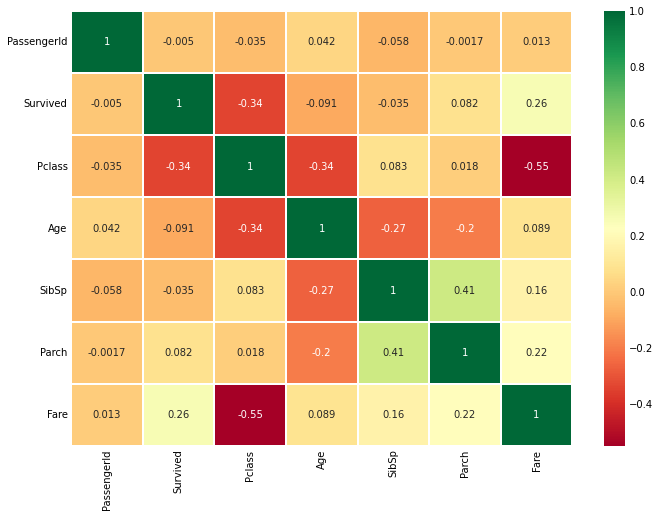

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# data.corr() - 상관관계 매트릭스
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()